In [1]:

using Latexify
using AbstractAlgebra
using GLMakie

In [2]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [3]:
Makie.inline!(true)

true

# BASES: BASIC BUILDING BLOCKS

creating the polynomials rings

In [300]:
R, x = polynomial_ring(QQ, :x => (1:3))

(Multivariate polynomial ring in 3 variables over rationals, AbstractAlgebra.Generic.MPoly{Rational{BigInt}}[x[1], x[2], x[3]])

In [301]:
M3 = matrix_space(R, 3, 3)

Matrix space of 3 rows and 3 columns
  over multivariate polynomial ring in 3 variables over rationals

In [302]:
A = M3([1 0 1; 0 1 0; 1 0 1])

[1   0   1]
[0   1   0]
[1   0   1]

In [303]:
A * x

3-element Vector{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}:
 x[1] + x[3]
 x[2]
 x[1] + x[3]

In [304]:
R[1 2 3; 4 5 6; 7 8 9] * transpose(R[x x x])

[ 6*x[1]    6*x[2]    6*x[3]]
[15*x[1]   15*x[2]   15*x[3]]
[24*x[1]   24*x[2]   24*x[3]]

In [305]:
[A[:, 2]]

1-element Vector{Vector{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}}:
 [0, 1, 0]

In [306]:
a = [1 0 1; 0 1 0; 1 0 1];
latexify(a)

L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

In [307]:
latexify(a[: , 1])

L"\begin{equation}
\left[
\begin{array}{c}
1 \\
0 \\
1 \\
\end{array}
\right]
\end{equation}
"

In [308]:
nullspace(A)

(1, [1; 0; -1])

In [309]:
null_space = [1; 0; -1];
latexify(null_space)

L"\begin{equation}
\left[
\begin{array}{c}
1 \\
0 \\
-1 \\
\end{array}
\right]
\end{equation}
"

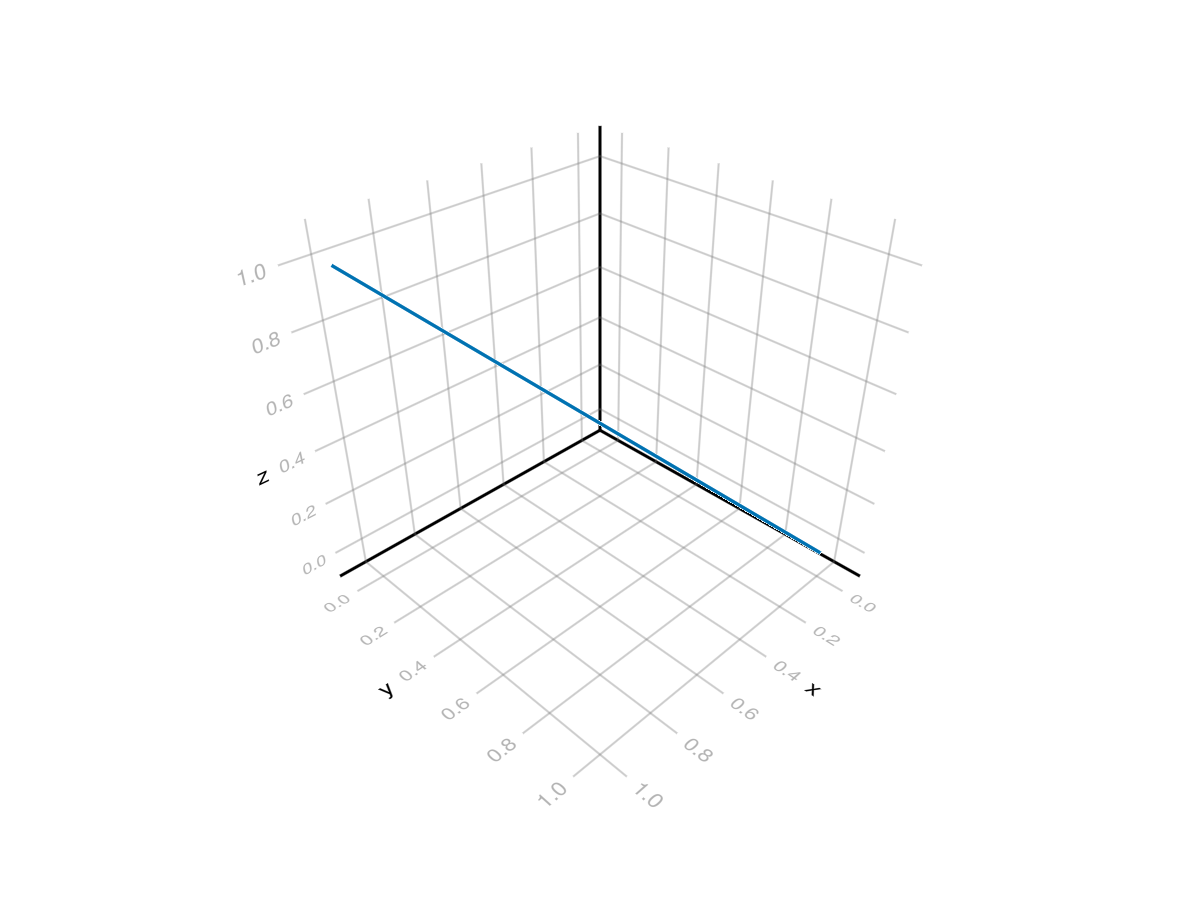

In [310]:
lines(a)

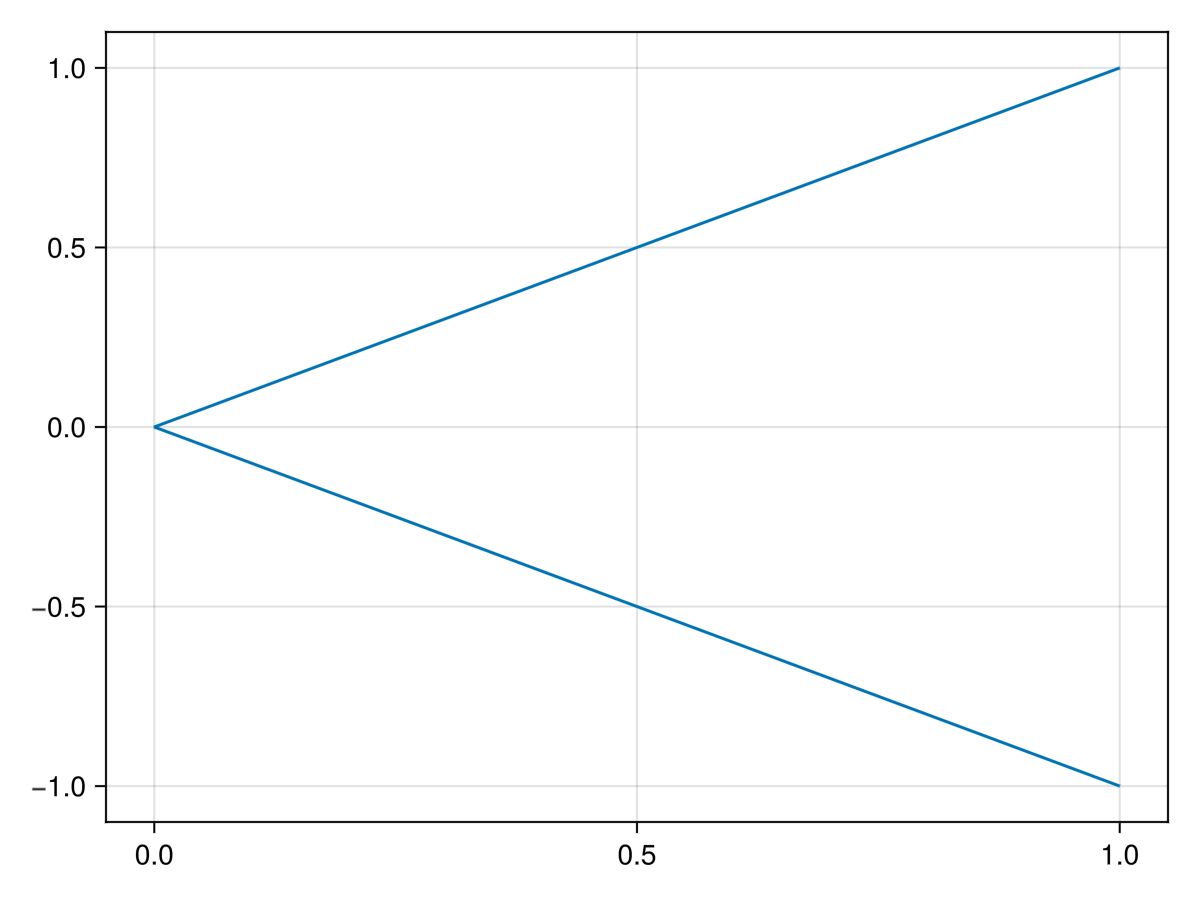

In [311]:
lines(a[:, 1], null_space)

In [312]:
latexify(a[:])

L"\begin{equation}
\left[
\begin{array}{c}
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1 \\
\end{array}
\right]
\end{equation}
"

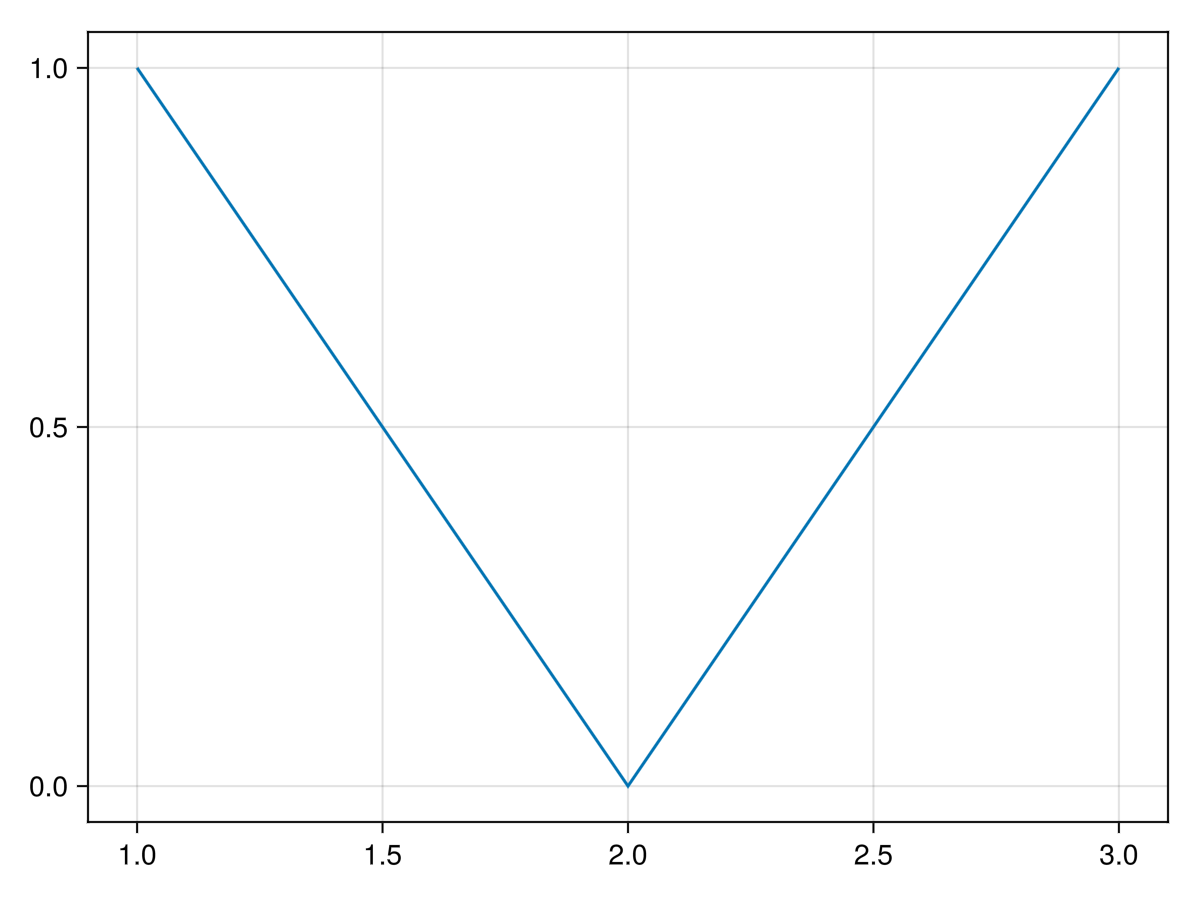

In [313]:
lines(a[:1, :])

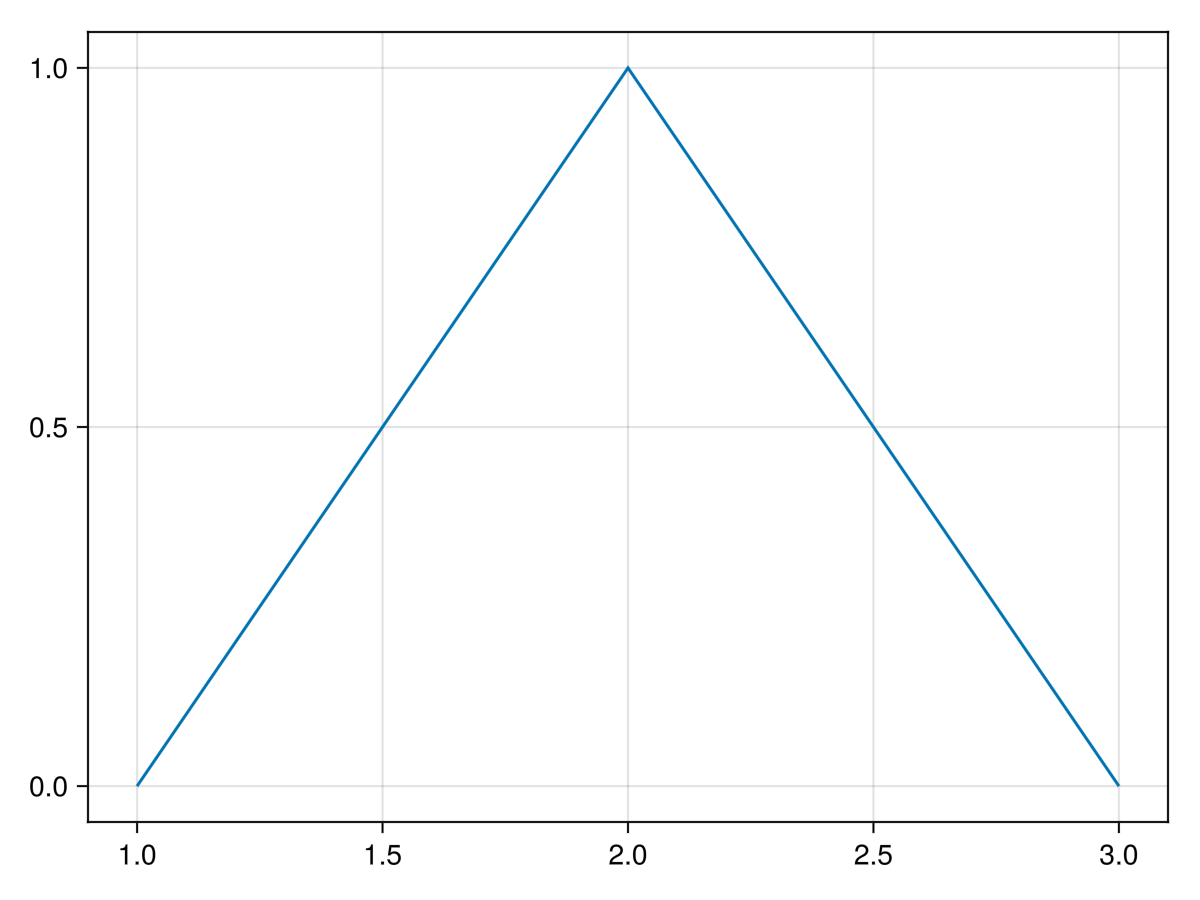

In [314]:
lines(a[:2, :])

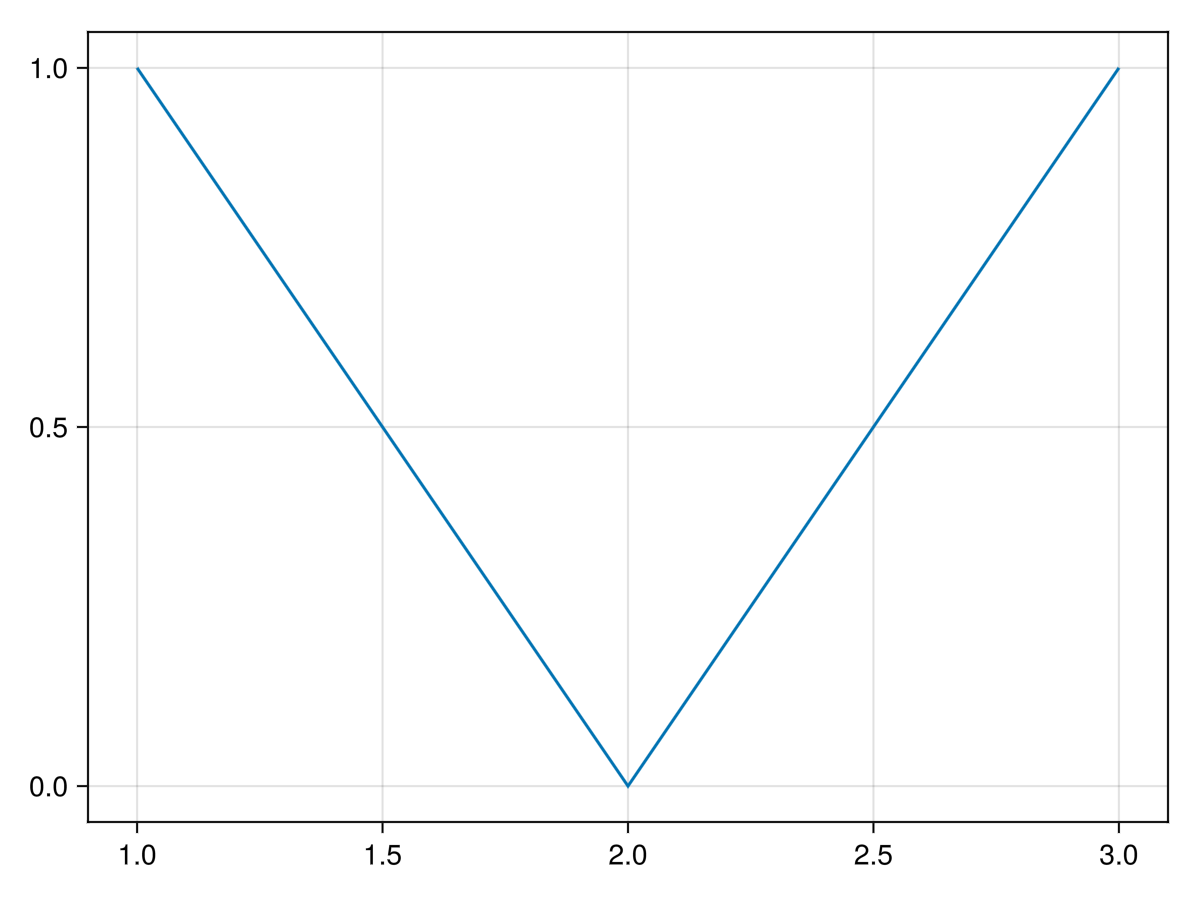

In [315]:
lines(a[:, :1])

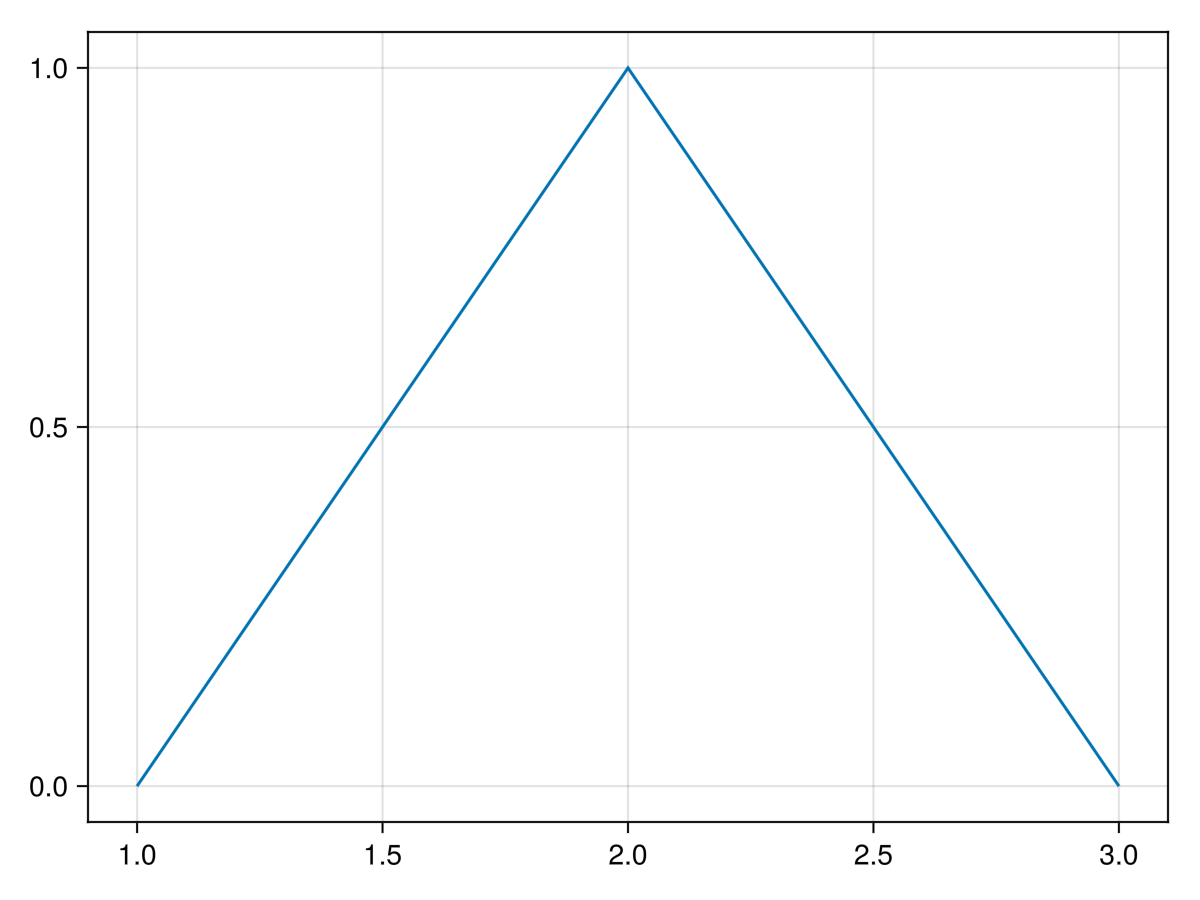

In [316]:
lines(a[:, :2])

In [317]:
e = [1 0 0; 0 1 0; 0 0 1];
latexify(e)

L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

In [318]:
b = [3, -1, 4];
latexify(b)

L"\begin{equation}
\left[
\begin{array}{c}
3 \\
-1 \\
4 \\
\end{array}
\right]
\end{equation}
"

In [319]:
latexify(b .* e)

L"\begin{equation}
\left[
\begin{array}{ccc}
3 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 4 \\
\end{array}
\right]
\end{equation}
"

In [320]:
c = [1 0 0; 1 1 0; 1 1 1];
latexify(c)

L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{array}
\right]
\end{equation}
"

In [321]:
latexify(b .* c)

L"\begin{equation}
\left[
\begin{array}{ccc}
3 & 0 & 0 \\
-1 & -1 & 0 \\
4 & 4 & 4 \\
\end{array}
\right]
\end{equation}
"

In [322]:
latexify(b .* a)

L"\begin{equation}
\left[
\begin{array}{ccc}
3 & 0 & 3 \\
0 & -1 & 0 \\
4 & 0 & 4 \\
\end{array}
\right]
\end{equation}
"

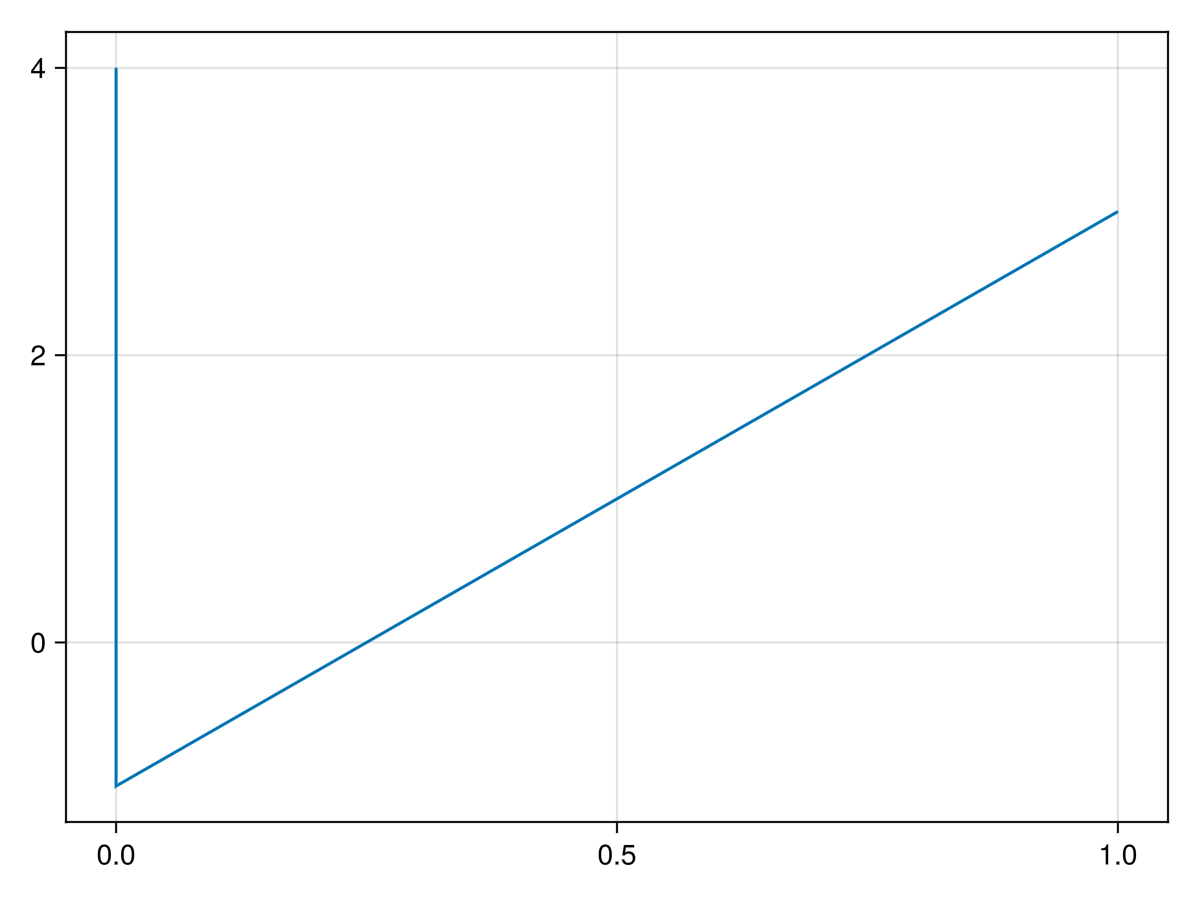

In [323]:
lines(e[1:3], b)

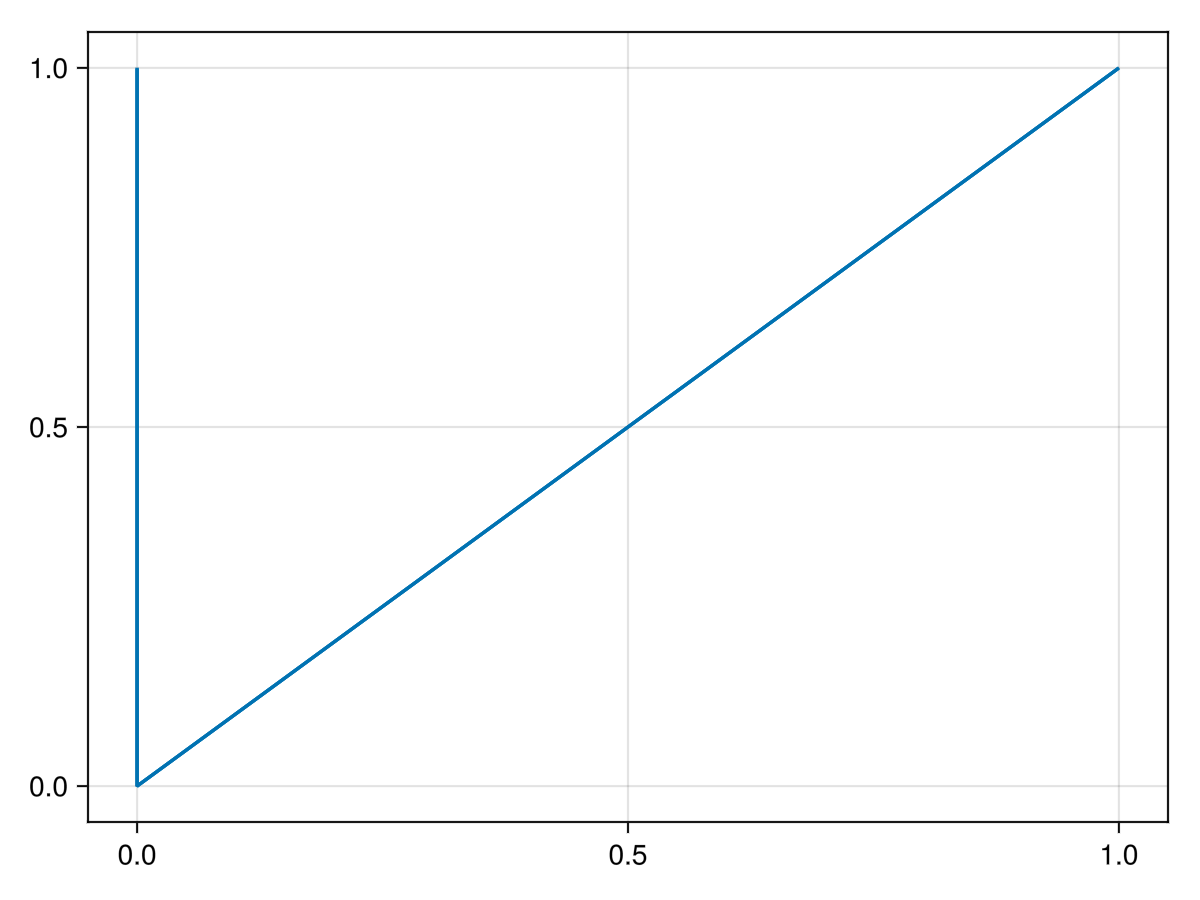

In [324]:
lines(e[:], a[:])

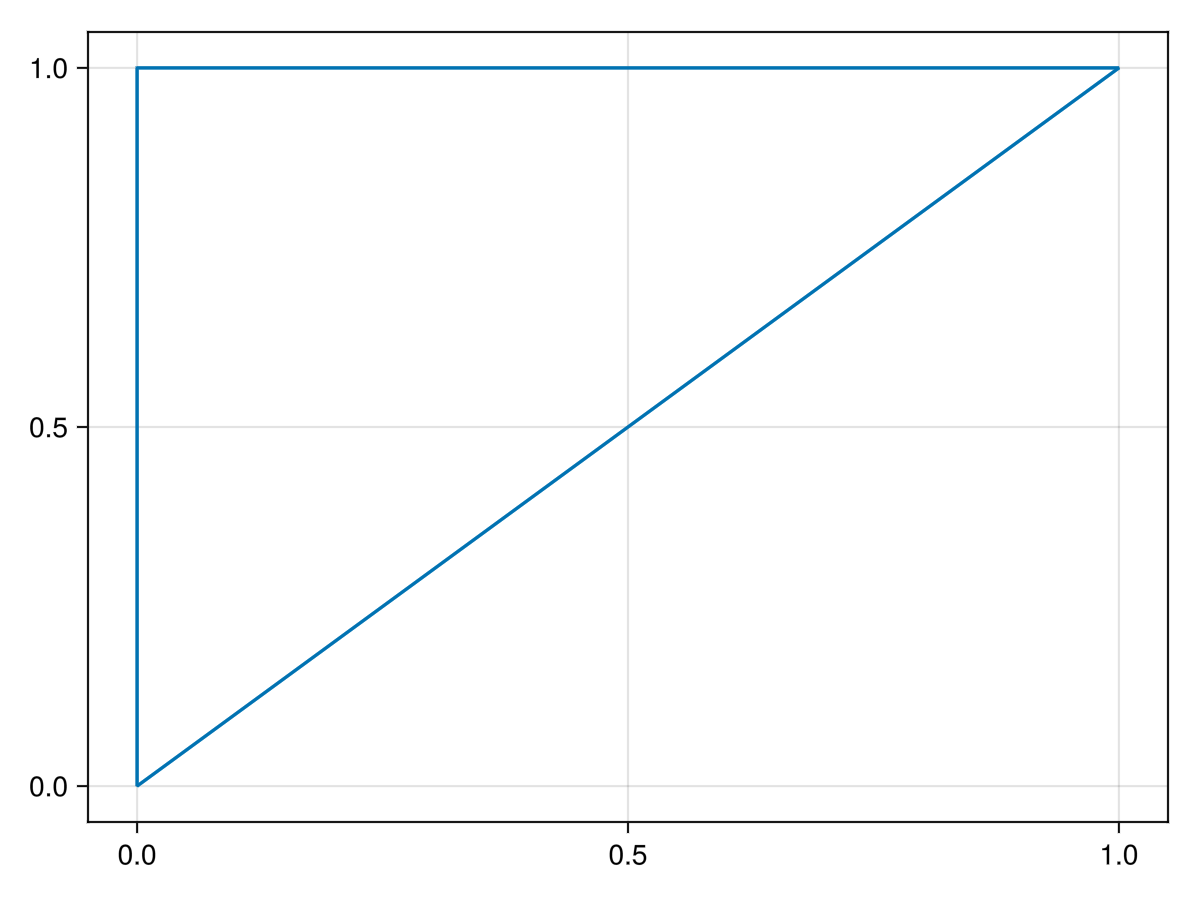

In [325]:
lines(e[:], c[:])

## How to Find a Basis for a Column Space

In [502]:
R, c = polynomial_ring(QQ, :c => (1:5))

(Multivariate polynomial ring in 5 variables over rationals, AbstractAlgebra.Generic.MPoly{Rational{BigInt}}[c[1], c[2], c[3], c[4], c[5]])

In [503]:
MS = matrix_space(R, 4, 5)

Matrix space of 4 rows and 5 columns
  over multivariate polynomial ring in 5 variables over rationals

In [544]:
A = MS([1 2 3 4 5;
        6 7 8 9 10;
        11 12 13 14 15;
        16 17 18 19 21])

[ 1    2    3    4    5]
[ 6    7    8    9   10]
[11   12   13   14   15]
[16   17   18   19   21]

In [505]:
expr =  A * c

4-element Vector{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}:
 c[1] + 2*c[2] + 3*c[3] + 4*c[4] + 5*c[5]
 6*c[1] + 7*c[2] + 8*c[3] + 9*c[4] + 10*c[5]
 11*c[1] + 12*c[2] + 13*c[3] + 14*c[4] + 15*c[5]
 16*c[1] + 17*c[2] + 18*c[3] + 19*c[4] + 21*c[5]

***How to Find a Basis for a Row Space***

The RREF result show clear the non leading 1ones columns and rows.

In [613]:
RREF = rref_rational(A)[2]

[-5    0     5    10    0]
[ 0   -5   -10   -15    0]
[ 0    0     0     0   -5]
[ 0    0     0     0    0]

In [628]:
row_s = rref_rational(A)[2][1:3, :]

[-5    0     5    10    0]
[ 0   -5   -10   -15    0]
[ 0    0     0     0   -5]

How to Find a Basis for a Column Space

In [593]:
col_s = transpose(r)

[-5     0    0]
[ 0    -5    0]
[ 5   -10    0]
[10   -15    0]
[ 0     0   -5]

In [507]:
e = hcat(A[:, 1:2], A[:, 5:5])

[ 1    2    5]
[ 6    7   10]
[11   12   15]
[16   17   21]

In [508]:
rref_rational(e)[2]

[-5    0    0]
[ 0   -5    0]
[ 0    0   -5]
[ 0    0    0]

The basis in RREF of the independent variables, are the c1, c2 and c3.

In [594]:
basis_rref = rref_rational(e)[2] - (rref_rational(e)[3] - 1)

[1   0   0]
[0   1   0]
[0   0   1]
[0   0   0]

In [625]:
basis_rref[:, :3] .* RREF[:, :5]

4-element Vector{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}:
 0
 0
 -5
 0

***How to Find a Basis for a Null-Space***

In [510]:
c[1] - 2c[2] + c[3] ~ 0

c[1] - 2*c[2] + c[3] ~ 0

In [511]:
A[:, 1] .- 2 .* A[:, 2] + A[:, 3]

4-element Vector{AbstractAlgebra.Generic.MPoly{Rational{BigInt}}}:
 0
 0
 0
 0

**The Rank-Nullity Theorem**

In [639]:
size(row_s)

(3, 5)

In [641]:
size(col_s)

(5, 3)

In [642]:
size(row_s) == size(transpose(col_s))

true

The rank is dimention of the row or col space.

In [645]:
rank(row_s)

3

In [648]:
null_s = nullspace(A)[2]

[  5    10]
[-10   -15]
[  5     0]
[  0     5]
[  0     0]

The total number of colums is the number of free variables columns or nullity of A + the leading col ones.

In [655]:
size(null_s)[2] + size(col_s)[2]

5

The THEOREM state: the rank of A plus the nullity of A is the total of number of columns of A.

In [658]:
rank(A) + size(null_s)[2]

5